### Importing Libraries

In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score # 

In [2]:
pip install --upgrade scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install imblearn

In [4]:
pip install scikit-learn==1.1.0 imbalanced-learn==0.9.1

^C
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip show scikit-learn imbalanced-learn

  Using cached scikit-learn-1.1.0.tar.gz (6.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [66 lines of output]
  Partial import of sklearn during the build process.
  setup.py:128: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
    from numpy.distutils.command.build_ext import build_ext  # noqa
  INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  Traceback (most recent call last):
    File "C:\Users\91805\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\9180

Name: scikit-learn
Version: 1.5.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\91805\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: daal4py, imbalanced-learn, scikit-learn-intelex, scikit-plot
---
Name: imbalanced-learn
Version: 0.12.3
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: C:\Users\91805\anaconda3\Lib\site-packages
Requires: joblib, numpy, scikit-learn, scipy, threadpoolctl
Required-by: imblearn
Note: you may need to restart the kernel to use updated packages.


#### Reading csv

In [6]:
import pandas as pd
df = pd.read_csv(r"C:\Users\91805\OneDrive\Desktop\churn project\tel_churn.csv")

In [7]:
df=df.drop('Unnamed: 0',axis=1)

In [8]:
x=df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [9]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

##### Train Test Split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#### Decision Tree Classifier

In [11]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [12]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [13]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [14]:
model_dt.score(x_test,y_test)

0.7910447761194029

In [15]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1058
           1       0.60      0.48      0.53       349

    accuracy                           0.79      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



###### As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

###### Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

###### Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [16]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x, y)

In [17]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [18]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [19]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9374464438731791
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       552
           1       0.93      0.95      0.94       615

    accuracy                           0.94      1167
   macro avg       0.94      0.94      0.94      1167
weighted avg       0.94      0.94      0.94      1167



In [20]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[508  44]
 [ 29 586]]


###### Now we can see quite better results, i.e. Accuracy: 92 %, and a very good recall, precision & f1 score for minority class.

###### Let's try with some other classifier.

#### Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [23]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [24]:
y_pred=model_rf.predict(x_test)

In [25]:
model_rf.score(x_test,y_test)

0.7903340440653873

In [26]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1058
           1       0.61      0.42      0.50       349

    accuracy                           0.79      1407
   macro avg       0.72      0.67      0.68      1407
weighted avg       0.77      0.79      0.78      1407



In [27]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x, y)


In [28]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [29]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [30]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [31]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [32]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [33]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9268707482993197
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       519
           1       0.91      0.96      0.94       657

    accuracy                           0.93      1176
   macro avg       0.93      0.92      0.93      1176
weighted avg       0.93      0.93      0.93      1176



In [34]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[456  63]
 [ 23 634]]


In [35]:
from sklearn.linear_model import LogisticRegression
import joblib


# Create and train the Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(xr_train1, yr_train1)

# Predict using the Logistic Regression model
yr_predict_lr = model_lr.predict(xr_test1)

# Calculate model score
model_score_lr = model_lr.score(xr_test1, yr_test1)
print("Logistic Regression Model Score:", model_score_lr)

# Print confusion matrix
print("Confusion Matrix (Logistic Regression):")
print(metrics.confusion_matrix(yr_test1, yr_predict_lr))

# Print classification report
print("Classification Report (Logistic Regression):")
print(metrics.classification_report(yr_test1, yr_predict_lr))
joblib.dump(model_lr, 'churn_prediction_model.pkl')

Logistic Regression Model Score: 0.9175170068027211
Confusion Matrix (Logistic Regression):
[[461  58]
 [ 39 618]]
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       519
           1       0.91      0.94      0.93       657

    accuracy                           0.92      1176
   macro avg       0.92      0.91      0.92      1176
weighted avg       0.92      0.92      0.92      1176



['churn_prediction_model.pkl']

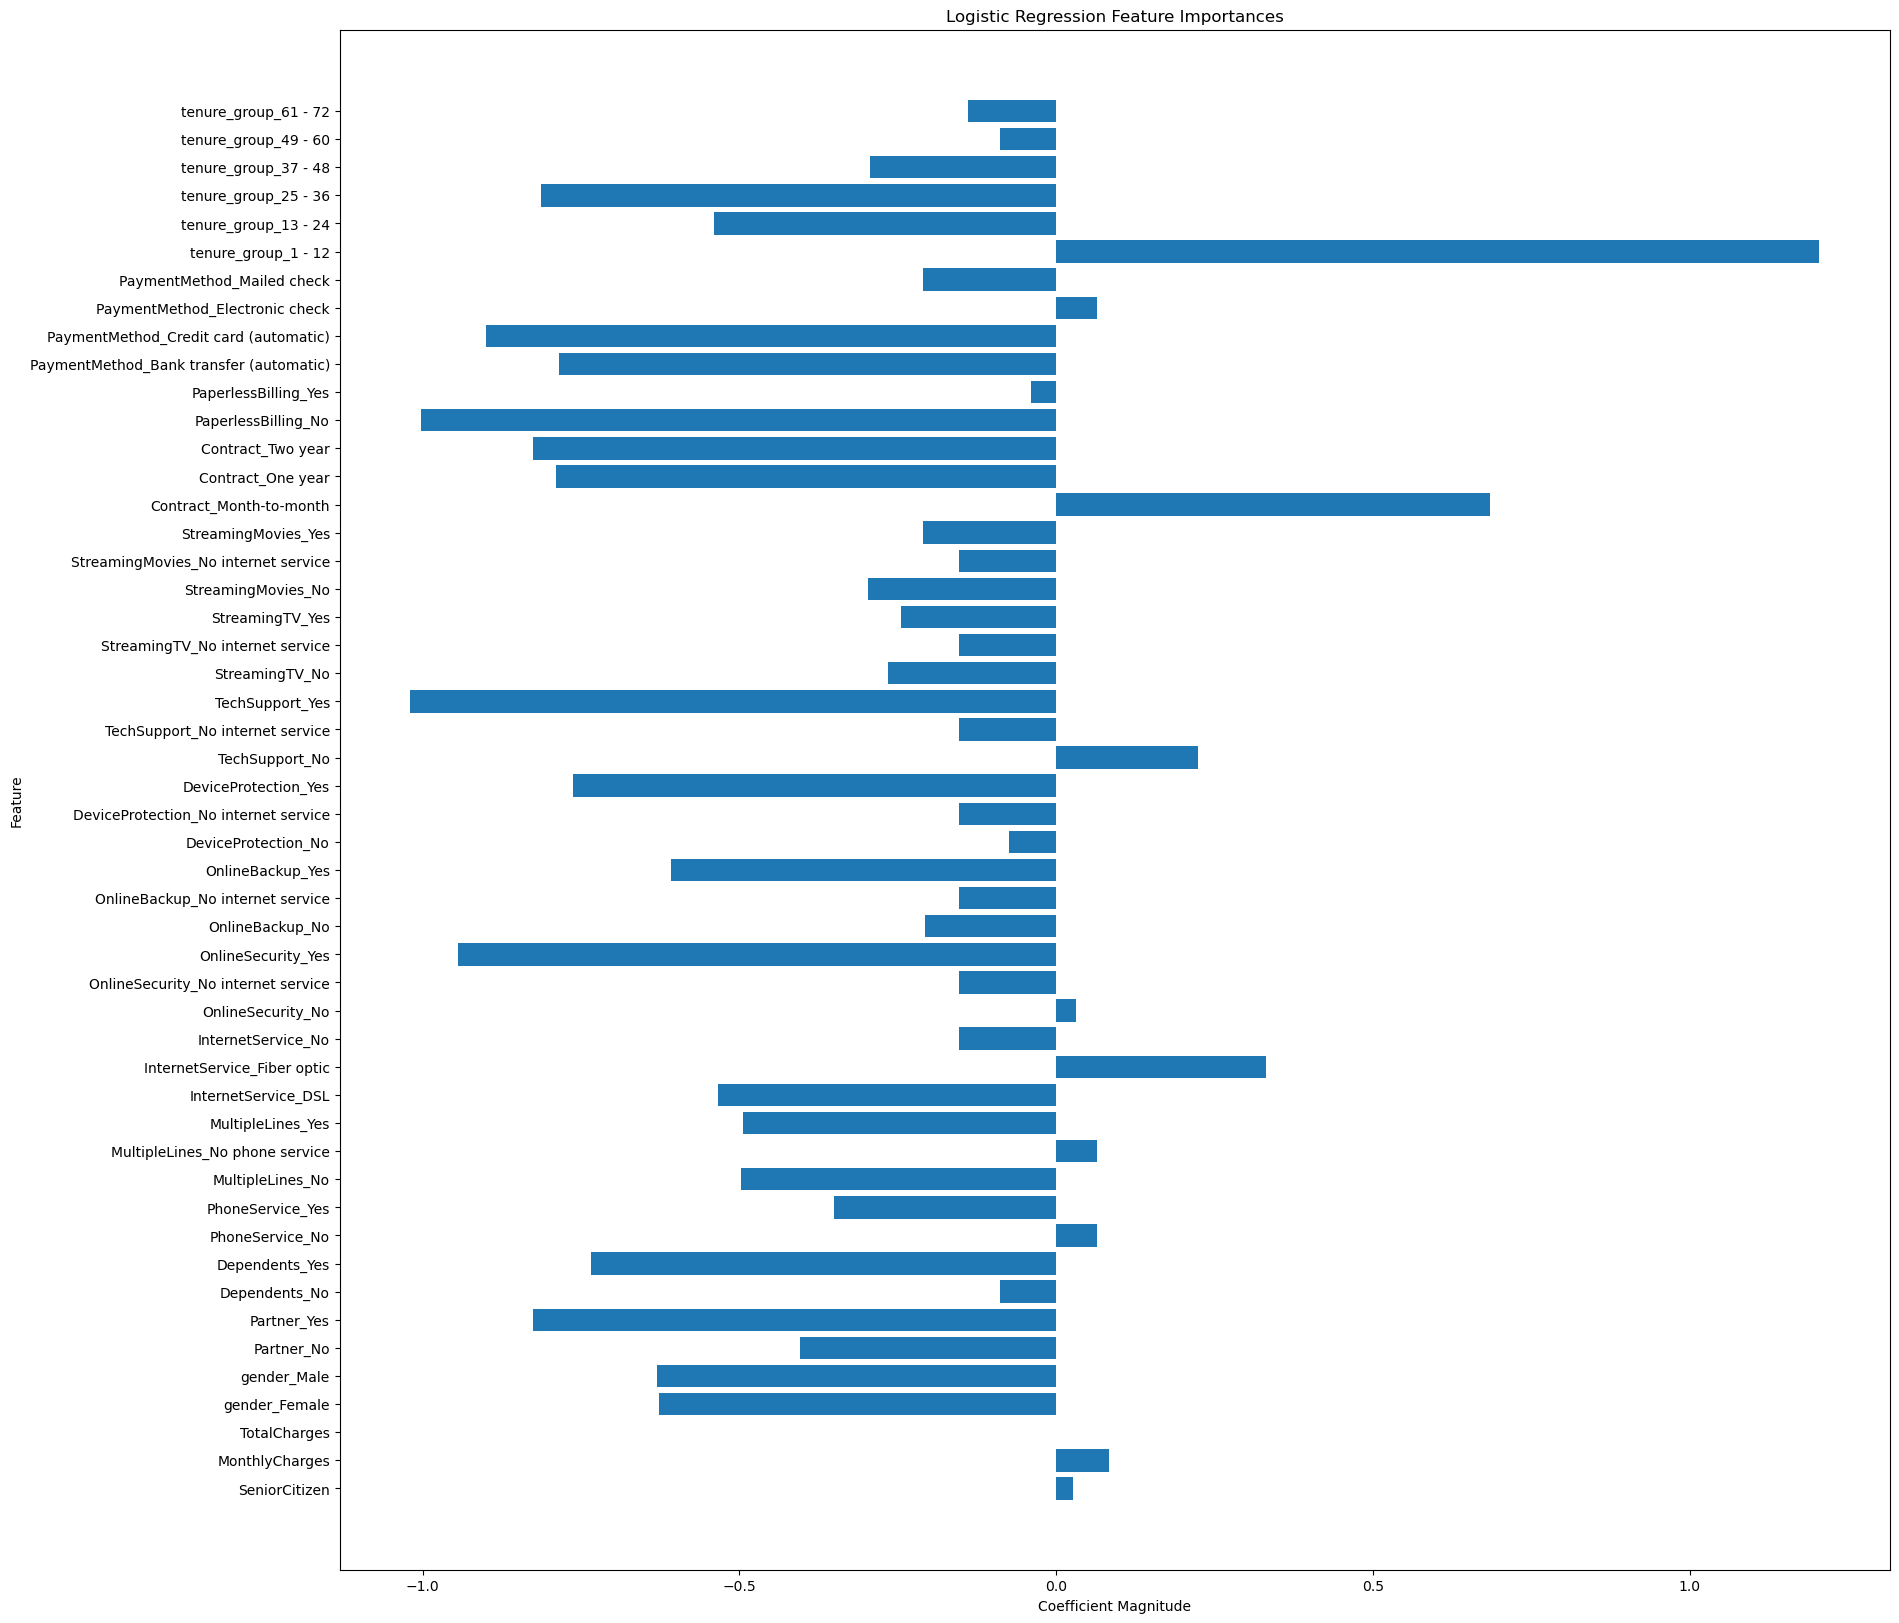

In [36]:
import matplotlib.pyplot as plt

coefficients = model_lr.coef_[0]

# Get feature names from the original DataFrame
feature_names = xr_train1.columns

# Create a bar plot to visualize feature importances
plt.figure(figsize=(20, 20))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Logistic Regression Feature Importances')
plt.show()

In [37]:
columns_to_remove = [
    'tenure_group_1 - 12', 'tenure_group_13 - 24', 'tenure_group_25 - 36', 'tenure_group_37 - 48', 'tenure_group_49 - 60', 'tenure_group_61 - 72','StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes','TotalCharges','MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes']
df_cleaned = df.drop(columns=columns_to_remove)

print("New DataFrame after removing specified columns:")
print(df_cleaned)
    

New DataFrame after removing specified columns:
      SeniorCitizen  MonthlyCharges  Churn  gender_Female  gender_Male  \
0                 0           29.85      0              1            0   
1                 0           56.95      0              0            1   
2                 0           53.85      1              0            1   
3                 0           42.30      0              0            1   
4                 0           70.70      1              1            0   
...             ...             ...    ...            ...          ...   
7027              0           84.80      0              0            1   
7028              0          103.20      0              1            0   
7029              0           29.60      0              1            0   
7030              1           74.40      1              0            1   
7031              0          105.65      0              0            1   

      Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  P

In [38]:
X = df_cleaned.drop([ 'Churn'], axis=1)
y = df_cleaned['Churn']
from imblearn.combine import SMOTEENN

sm = SMOTEENN()
X_resamplednew, y_resamplednew = sm.fit_resample(X, y)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resamplednew, y_resamplednew, test_size=0.2, random_state=42)

# Create and train the logistic regression model
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)
joblib.dump(log_reg, 'finalize.pkl')

Accuracy: 0.94
Confusion Matrix:
[[490  42]
 [ 37 664]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       532
           1       0.94      0.95      0.94       701

    accuracy                           0.94      1233
   macro avg       0.94      0.93      0.93      1233
weighted avg       0.94      0.94      0.94      1233



['finalize.pkl']

In [39]:
import joblib
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression

# Assuming X_resamplednew and y_resamplednew are numpy arrays
X_train, X_test, y_train, y_test = train_test_split(X_resamplednew.values, y_resamplednew.values, test_size=0.2, random_state=42)

# Create and train the logistic regression model
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Save the model
joblib.dump(log_reg, 'finalize.pkl')


Accuracy: 0.94
Confusion Matrix:
[[490  42]
 [ 37 664]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       532
           1       0.94      0.95      0.94       701

    accuracy                           0.94      1233
   macro avg       0.94      0.93      0.93      1233
weighted avg       0.94      0.94      0.94      1233



['finalize.pkl']

In [40]:
len(X_train[0])

37

In [41]:
len(log_reg.coef_[0])

37

In [42]:
X_train

array([[  0.        ,  19.05      ,   1.        , ...,   0.        ,
          0.        ,   1.        ],
       [  0.        ,  79.84763766,   1.        , ...,   0.        ,
          0.        ,   1.        ],
       [  0.        ,  20.5       ,   0.        , ...,   0.        ,
          0.        ,   1.        ],
       ...,
       [  0.        ,  77.99978998,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 105.63611528,   0.        , ...,   0.        ,
          1.        ,   0.        ],
       [  0.        ,  19.8       ,   0.        , ...,   1.        ,
          0.        ,   0.        ]])

#### Performing PCA

In [43]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [44]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [45]:
model.fit(xr_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [46]:
yr_predict_pca = model.predict(xr_test_pca)

In [47]:
model_score_r_pca = model.score(xr_test_pca, yr_test1)

In [48]:
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.7346938775510204
              precision    recall  f1-score   support

           0       0.74      0.62      0.67       519
           1       0.73      0.82      0.78       657

    accuracy                           0.73      1176
   macro avg       0.74      0.72      0.73      1176
weighted avg       0.73      0.73      0.73      1176



In [49]:
!pip install tensorflow

In [50]:
# Assuming x_train and y_train are NumPy arrays
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of x_train: (5625, 50)
Shape of y_train: (4928,)


In [51]:
df_cleaned

,SeniorCitizen,MonthlyCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingTV_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,29.85,0,1,0,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0,56.95,0,0,1,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0,53.85,1,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,42.30,0,0,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,70.70,1,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,0,0,1,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7028,0,103.20,0,1,0,0,1,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7029,0,29.60,0,1,0,0,1,0,1,1,...,0,1,0,0,0,1,0,0,1,0
7030,1,74.40,1,0,1,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [ ]:
import joblib
import numpy as np
import pandas as pd

# Load churn prediction model
churn_model = joblib.load('finalize.pkl')

class RecommendationSystem:
    def __init__(self, churn_model):
        self.churn_model = churn_model
        self.user_feedback = {}  # Dictionary to store declined charges for each user

    def recommend_plans(self, user_id, user_input, min_threshold=0.40, max_threshold=0.50, min_price=18, max_price=118):
        declined_charges = self.user_feedback.get(user_id, [])
        monthly_charges_range = np.array([x for x in np.arange(min_price, max_price + 1, 1) if x not in declined_charges])

        # Create DataFrame with varying monthly charges
        temp_df = pd.DataFrame([user_input] * len(monthly_charges_range))
        temp_df['MonthlyCharges'] = monthly_charges_range

        # Predict churn probabilities
        churn_probabilities = self.churn_model.predict_proba(temp_df)[:, 1]

        # Print churn probabilities for debugging
        print("Churn probabilities:", churn_probabilities)

        # Find the optimal monthly charge within the specified thresholds
        valid_charges = [monthly_charges_range[i] for i in range(len(churn_probabilities)) if min_threshold <= churn_probabilities[i] <= max_threshold]
        if valid_charges:
            best_monthly_charge = min(valid_charges)
        else:
            best_monthly_charge = max_price  # If no valid charges, default to max_price
        
        return {
            'user_id': user_id,
            'plan': 'Recommended Plan',
            'monthly_charges': best_monthly_charge
        }

    def receive_feedback(self, user_id, declined_charge):
        # Add the declined charge to the user's feedback list
        if user_id not in self.user_feedback:
            self.user_feedback[user_id] = []
        
        self.user_feedback[user_id].append(declined_charge)
        print(f"User {user_id} declined monthly charge: {declined_charge}")

# Function to get user input
def get_user_input():
    print("Please enter your details:")

    def safe_input(prompt, valid_range):
        while True:
            try:
                # Read the input and convert it to an integer
                value = int(input(prompt))
                # Check if the value is within the valid range
                if value not in valid_range:
                    raise ValueError(f"Input must be one of {valid_range}")
                return value  # If valid, return the value
            except ValueError as ve:
                # Provide feedback and ask for correct input
                print(f"Invalid input. Please enter a valid number. {ve}")

    # Use safe_input to validate all user inputs
    senior_citizen = safe_input("Senior Citizen (1 for Yes, 0 for No): ", [0, 1])
    gender = safe_input("Gender (1 for Female, 0 for Male): ", [0, 1])
    partner = safe_input("Partner (1 for Yes, 0 for No): ", [0, 1])
    dependents = safe_input("Dependents (1 for Yes, 0 for No): ", [0, 1])
    phone_service = safe_input("Phone Service (1 for Yes, 0 for No): ", [0, 1])
    internet_service = safe_input("Internet service (1 for DSL, 2 for Fiber optic, 3 for No): ", [1, 2, 3])
    online_security = safe_input("Online Security (1 for Yes, 0 for No, 2 for No internet service): ", [0, 1, 2])
    online_backup = safe_input("Online Backup (1 for Yes, 0 for No, 2 for No internet service): ", [0, 1, 2])
    device_protection = safe_input("Device Protection (1 for Yes, 0 for No, 2 for No internet service): ", [0, 1, 2])
    tech_support = safe_input("Tech Support (1 for Yes, 0 for No, 2 for No internet service): ", [0, 1, 2])
    streaming_tv = safe_input("Streaming TV (1 for Yes, 0 for No, 2 for No internet service): ", [0, 1, 2])
    contract_type = safe_input("Contract type (1 for Month-to-month, 2 for One year, 3 for Two year): ", [1, 2, 3])
    paperless_billing = safe_input("Paperless billing (1 for Yes, 0 for No): ", [0, 1])
    payment_method = safe_input("Payment method (1 for Electronic check, 2 for Mailed check, 3 for Bank transfer (automatic), 4 for Credit card (automatic)): ", [1, 2, 3, 4])

    # Return the validated user input as a dictionary
    return {
        'SeniorCitizen': senior_citizen,
        'gender_Female': 1 if gender == 1 else 0,
        'Partner_Yes': 1 if partner == 1 else 0,
        'Partner_No': 1 if partner == 0 else 0,
        'Dependents_Yes': 1 if dependents == 1 else 0,
        'Dependents_No': 1 if dependents == 0 else 0,
        'PhoneService_Yes': 1 if phone_service == 1 else 0,
        'PhoneService_No': 1 if phone_service == 0 else 0,
        'InternetService_DSL': 1 if internet_service == 1 else 0,
        'InternetService_Fiber optic': 1 if internet_service == 2 else 0,
        'InternetService_No': 1 if internet_service == 3 else 0,
        'OnlineSecurity_Yes': 1 if online_security == 1 else 0,
        'OnlineSecurity_No': 1 if online_security == 0 else 0,
        'OnlineSecurity_No internet service': 1 if online_security == 2 else 0,
        'OnlineBackup_Yes': 1 if online_backup == 1 else 0,
        'OnlineBackup_No': 1 if online_backup == 0 else 0,
        'OnlineBackup_No internet service': 1 if online_backup == 2 else 0,
        'DeviceProtection_Yes': 1 if device_protection == 1 else 0,
        'DeviceProtection_No': 1 if device_protection == 0 else 0,
        'DeviceProtection_No internet service': 1 if device_protection == 2 else 0,
        'TechSupport_Yes': 1 if tech_support == 1 else 0,
        'TechSupport_No': 1 if tech_support == 0 else 0,
        'TechSupport_No internet service': 1 if tech_support == 2 else 0,
        'StreamingTV_Yes': 1 if streaming_tv == 1 else 0,
        'StreamingTV_No': 1 if streaming_tv == 0 else 0,
        'StreamingTV_No internet service': 1 if streaming_tv == 2 else 0,
        'Contract_Month-to-month': 1 if contract_type == 1 else 0,
        'Contract_One year': 1 if contract_type == 2 else 0,
        'Contract_Two year': 1 if contract_type == 3 else 0,
        'PaperlessBilling_Yes': 1 if paperless_billing == 1 else 0,
        'PaperlessBilling_No': 1 if paperless_billing == 0 else 0,
        'PaymentMethod_Bank transfer (automatic)': 1 if payment_method == 3 else 0,
        'PaymentMethod_Credit card (automatic)': 1 if payment_method == 4 else 0,
        'PaymentMethod_Electronic check': 1 if payment_method == 1 else 0,
        'PaymentMethod_Mailed check': 1 if payment_method == 2 else 0,
    }

# Main function
def main():
    rec_system = RecommendationSystem(churn_model)
    
    # Get user input
    user_input = get_user_input()
    
    # Recommend plans based on user input
    user_id = 1  # Unique user ID
    recommended_plan = rec_system.recommend_plans(user_id, user_input)
    
    # Display the recommended plan
    print("Recommended plan:")
    print(f"Plan: {recommended_plan['plan']}, Monthly Charges: {recommended_plan['monthly_charges']}")
    
    # Ask the user if they accept the recommendation
    proceed = input("Do you want to proceed with this plan? (yes/no): ").lower()
    if proceed == "no":
        # If the user declines, record the declined charge
        declined_charge = recommended_plan['monthly_charges']
        rec_system.receive_feedback(user_id, declined_charge)
        
        # Provide a new recommendation
        new_recommendation = rec_system.recommend_plans(user_id, user_input)
        print("Updated recommended plan:")
        print(f"Plan: {new_recommendation['plan']}, Monthly Charges: {new_recommendation['monthly_charges']}")
    else:
        print("Plan accepted. Proceeding with the recommendation.")

# Execute main function
if __name__ == "__main__":
    main()


Please enter your details:
Senior Citizen (1 for Yes, 0 for No): 8
Invalid input. Please enter a valid number. Input must be one of [0, 1]


In [5]:
import pandas as pd
import joblib
import numpy as np

# Load the churn prediction model
churn_model = joblib.load('finalize.pkl')

# Function to collect user input
def get_user_input():
    print("Please enter your details:")
    senior_citizen = int(input("Senior Citizen (1 for Yes, 0 for No): "))
    gender = int(input("Gender (1 for Female, 0 for Male): "))
    partner = int(input("Partner (1 for Yes, 0 for No): "))
    dependents = int(input("Dependents (1 for Yes, 0 for No): "))
    phone_service = int(input("Phone Service (1 for Yes, 0 for No): "))
    internet_service = int(input("Internet service (1 for DSL, 2 for Fiber optic, 3 for No): "))
    online_security = int(input("Online Security (1 for Yes, 0 for No, 2 for No internet service): "))
    online_backup = int(input("Online Backup (1 for Yes, 0 for No, 2 for No internet service): "))
    device_protection = int(input("Device Protection (1 for Yes, 0 for No, 2 for No internet service): "))
    tech_support = int(input("Tech Support (1 for Yes, 0 for No, 2 for No internet service): "))
    streaming_tv = int(input("Streaming TV (1 for Yes, 0 for No, 2 for No internet service): "))
    contract_type = int(input("Contract type (1 for Month-to-month, 2 for One year, 3 for Two year): "))
    paperless_billing = int(input("Paperless billing (1 for Yes, 0 for No): "))
    payment_method = int(input("Payment method (1 for Electronic check, 2 for Mailed check, 3 for Bank transfer (automatic), 4 for Credit card (automatic)): "))

    # Return user input as dictionary
    return {
        'SeniorCitizen': senior_citizen,
        'MonthlyCharges': 0,
        'gender_Female': 1 if gender == 1 else 0,
        'gender_Male': 1 if gender == 0 else 0,
        'Partner_No': 1 if partner == 0 else 0,
        'Partner_Yes': 1 if partner == 1 else 0,
        'Dependents_No': 1 if dependents == 0 else 0,
        'Dependents_Yes': 1 if dependents == 1 else 0,
        'PhoneService_No': 1 if phone_service == 0 else 0,
        'PhoneService_Yes': 1 if phone_service == 1 else 0,
        'InternetService_DSL': 1 if internet_service == 1 else 0,
        'InternetService_Fiber optic': 1 if internet_service == 2 else 0,
        'InternetService_No': 1 if internet_service == 3 else 0,
        'OnlineSecurity_No': 1 if online_security == 0 else 0,
        'OnlineSecurity_Yes': 1 if online_security == 1 else 0,
        'OnlineSecurity_No internet service': 1 if online_security == 2 else 0,
        'OnlineBackup_No': 1 if online_backup == 0 else 0,
        'OnlineBackup_Yes': 1 if online_backup == 1 else 0,
        'OnlineBackup_No internet service': 1 if online_backup == 2 else 0,
        'DeviceProtection_No': 1 if device_protection == 0 else 0,
        'DeviceProtection_Yes': 1 if device_protection == 1 else 0,
        'DeviceProtection_No internet service': 1 if device_protection == 2 else 0,
        'TechSupport_No': 1 if tech_support == 0 else 0,
        'TechSupport_Yes': 1 if tech_support == 1 else 0,
        'TechSupport_No internet service': 1 if tech_support == 2 else 0,
        'StreamingTV_No': 1 if streaming_tv == 0 else 0,
        'StreamingTV_Yes': 1 if streaming_tv == 1 else 0,
        'StreamingTV_No internet service': 1 if streaming_tv == 2 else 0,
        'Contract_Month-to-month': 1 if contract_type == 1 else 0,
        'Contract_One year': 1 if contract_type == 2 else 0,
        'Contract_Two year': 1 if contract_type == 3 else 0,
        'PaperlessBilling_No': 1 if paperless_billing == 0 else 0,
        'PaperlessBilling_Yes': 1 if paperless_billing == 1 else 0,
        'PaymentMethod_Bank transfer (automatic)': 1 if payment_method == 3 else 0,
        'PaymentMethod_Credit card (automatic)': 1 if payment_method == 4 else 0,
        'PaymentMethod_Electronic check': 1 if payment_method == 1 else 0,
        'PaymentMethod_Mailed check': 1 if payment_method == 2 else 0
    }

# Class for recommendation system
class RecommendationSystem:
    def __init__(self, churn_model):
        self.churn_model = churn_model
        self.user_feedback = {}  # To track declined charges

    def recommend_plans(self, user_id, user_input, min_threshold=0.40, max_threshold=0.50, min_price=18, max_price=118):
        # Get declined charges for this user
        declined_charges = self.user_feedback.get(user_id, [])

        # Define the range of monthly charges, excluding declined charges
        monthly_charges_range = np.array([x for x in np.arange(min_price, max_price + 1, 1) if x not in declined_charges])
        
        # Create a DataFrame with user input and varying monthly charges
        temp_df = pd.DataFrame([user_input] * len(monthly_charges_range))
        temp_df['MonthlyCharges'] = monthly_charges_range
        
        # Predict churn probabilities
        churn_probabilities = self.churn_model.predict_proba(temp_df)[:, 1]

        # Find valid charges within defined thresholds
        valid_charges = [monthly_charges_range[i] for i in range(len(churn_probabilities)) if min_threshold <= churn_probabilities[i] <= max_threshold]

        # Select the minimum valid charge or default to max price if no valid charges
        if valid_charges:
            best_monthly_charge = min(valid_charges)  # Choose the minimum valid charge
        else:
            best_monthly_charge = max_price  # Default to max price if no valid charges

        return {
            'user_id': user_id,
            'plan': 'Recommended Plan',
            'monthly_charges': best_monthly_charge
        }

    def receive_feedback(self, user_id, declined_charge):
        # Record the declined charge for this user
        if user_id not in self.user_feedback:
            self.user_feedback[user_id] = []

        self.user_feedback[user_id].append(declined_charge)

# Main function to execute the code
def main():
    rec_system = RecommendationSystem(churn_model)

    # Get user input
    user_input = get_user_input()

    # Recommend plans based on user input
    user_id = 1  # Example user ID
    recommended_plan = rec_system.recommend_plans(user_id, user_input)

    # Display the recommended plan
    print("Recommended plan:")
    print(f"Plan: {recommended_plan['plan']}, Monthly Charges: {recommended_plan['monthly_charges']}")

    # Ask if the user accepts the recommendation
    proceed = input("Do you want to proceed with this plan? (yes/no): ").lower()

    if proceed == "no":
        declined_charge = recommended_plan['monthly_charges']
        rec_system.receive_feedback(user_id, declined_charge)  # Record declined charge

        # Generate a new recommendation based on the feedback
        new_recommendation = rec_system.recommend_plans(user_id, user_input)

        print("Updated recommended plan:")
        print(f"Plan: {new_recommendation['plan']}, Monthly Charges: {new_recommendation['monthly_charges']}")

    else:
        print("Plan accepted. Proceeding with the recommendation.")

# Execute the code
if __name__ == "__main__":
    main()


Please enter your details:
Senior Citizen (1 for Yes, 0 for No): 1
Gender (1 for Female, 0 for Male): 1
Partner (1 for Yes, 0 for No): 1
Dependents (1 for Yes, 0 for No): 1
Phone Service (1 for Yes, 0 for No): 1
Internet service (1 for DSL, 2 for Fiber optic, 3 for No): 1
Online Security (1 for Yes, 0 for No, 2 for No internet service): 2
Online Backup (1 for Yes, 0 for No, 2 for No internet service): 1
Device Protection (1 for Yes, 0 for No, 2 for No internet service): 2
Tech Support (1 for Yes, 0 for No, 2 for No internet service): 2
Streaming TV (1 for Yes, 0 for No, 2 for No internet service): 1
Contract type (1 for Month-to-month, 2 for One year, 3 for Two year): 1
Paperless billing (1 for Yes, 0 for No): 1
Payment method (1 for Electronic check, 2 for Mailed check, 3 for Bank transfer (automatic), 4 for Credit card (automatic)): 2


C:\Users\91805\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Recommended plan:
Plan: Recommended Plan, Monthly Charges: 76
Do you want to proceed with this plan? (yes/no): no
Updated recommended plan:
Plan: Recommended Plan, Monthly Charges: 77


C:\Users\91805\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


#### Pickling the model

In [55]:
import pickle

In [56]:
filename = 'model.sav'

In [57]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [58]:
load_model = pickle.load(open(filename, 'rb'))

In [59]:
model_score_r1 = load_model.score(xr_test1, yr_test1)

In [60]:
model_score_r1

0.9268707482993197